# housing.csv파일로 Boston House Price 예측하기

In [0]:
%tensorflow_version 2.x

**업로드한 housing.csv 파일을 읽고 데이터 프레임 생성**

In [2]:
import pandas as pd

df = pd.read_csv('housing.csv', header=None, delim_whitespace=True)
# ~> header=None: csv 파일에 컬럼 이름들이 없기 때문
# ~> delim_whitespace=True: csv 파일의 데이터가 공백으로 구분되고 있기 때문
df.head()
# print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**DataFrame을 데이터(집값에 영향을 미치는 변수들)과 집값을 분리**

In [3]:
dataset = df.to_numpy()
X = dataset[:, :-1]
Y = dataset[:, -1]
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

X shape: (506, 13), Y shape: (506,)


**X, Y를 train_set / test_set으로 분할**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}')

X_train shape: (354, 13), X_test shape: (152, 13)
Y_train shape: (354,), Y_test shape: (152,)


**신경망 생성**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Fully-connected layer 추가 - hidden_layer 2개, output_layer
model.add(Dense(30, activation='relu', input_dim=13)) # ~> 1st_hidden_layer
# input_dim=X_trian.shape[1]

model.add(Dense(6, activation='relu')) # ~> 2nd_hidden_layer

model.add(Dense(1)) # ~> output_layer
# 활성화 함수는 '예측 집값'이라는 output이 1개여서 없어도 된다. 

# 모델 컴파일
model.compile(loss='mean_squared_error', # 분류가 아닌 수치 예측이므로 MSE
              optimizer='adam')

**모델 학습(fit)**

In [6]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=200,
                    validation_split=0.2)

Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 2s 8ms/sample - loss: 10363.4402 - val_loss: 1694.2714
Epoch 2/200
283/283 [==============================] - 0s 377us/sample - loss: 721.4364 - val_loss: 277.7735
Epoch 3/200
283/283 [==============================] - 0s 393us/sample - loss: 318.9620 - val_loss: 178.5265
Epoch 4/200
283/283 [==============================] - 0s 369us/sample - loss: 245.2344 - val_loss: 147.2220
Epoch 5/200
283/283 [==============================] - 0s 360us/sample - loss: 215.5228 - val_loss: 151.1944
Epoch 6/200
283/283 [==============================] - 0s 390us/sample - loss: 201.6328 - val_loss: 123.6031
Epoch 7/200
283/283 [==============================] - 0s 385us/sample - loss: 174.1253 - val_loss: 118.5946
Epoch 8/200
283/283 [==============================] - 0s 374us/sample - loss: 163.5400 - val_loss: 114.3042
Epoch 9/200
283/283 [==============================] - 0s 333us/sample - loss: 154

**모델 평가 - 학습시킨 모델에 테스트 데이터로 평가**

In [7]:
eval = model.evaluate(X_test, Y_test)
print(eval)

152/152 [==============================] - 0s 82us/sample - loss: 35.6363
35.63625757317794


**주택 가격의 예측값 확인**

In [8]:
y_pred = model.predict(X_test) # y_pred는 2차원 배열
y_pred = y_pred.flatten() # 2차원 배열 y_pred를 1차원 배열로

# 실제값과 예측값 비교(10개만)
for i in range(10):
  true_val = Y_test[i]
  pred_val = y_pred[i]
  squared_error = (true_val - pred_val) ** 2
  print(f'true: {true_val}, pred: {pred_val}, se: {squared_error}')

true: 18.5, pred: 27.641639709472656, se: 83.56957657780731
true: 20.6, pred: 22.791656494140625, se: 4.803358188308769
true: 13.9, pred: 12.025256156921387, se: 3.5146644771611695
true: 19.9, pred: 22.174758911132812, se: 5.174528103778146
true: 23.0, pred: 24.798614501953125, se: 3.235014126636088
true: 30.1, pred: 38.333316802978516, se: 67.78750557820834
true: 23.1, pred: 29.745464324951172, se: 44.16219609419871
true: 22.0, pred: 30.749282836914062, se: 76.54995016031899
true: 11.0, pred: 12.82346248626709, se: 3.325015438823357
true: 33.1, pred: 36.63192367553711, se: 12.474484849819554


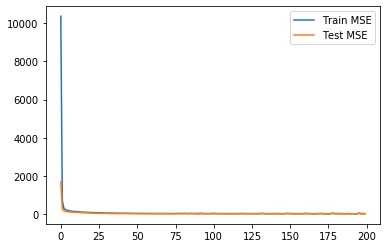

In [9]:
# Epochs-MSE 그래프
import matplotlib.pyplot as plt

losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train MSE')
plt.plot(val_losses, label='Test MSE')
plt.legend()
plt.show()

**모델 성능 개선 및 재 평가**

In [10]:
# X_train ~~~> Z-Score로 변환(z = (x - mean) / std)) 
# X_test 데이터는 X_train의 평균과 표준편차를 사용해 변환하고 평가 / 예측에 사용
import numpy as np

train_data = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
test_data = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
print('X_train_z_score =', train_data)
print('X_test_z_score =', test_data)

X_train_z_score = [[-0.41899749  2.00406281 -1.3831169  ... -0.06098538  0.14001803
  -0.99621301]
 [-0.38843865 -0.50086828 -0.56908083 ...  0.53236501  0.44696189
  -0.91124524]
 [-0.33594927 -0.50086828 -0.2085587  ... -0.01534305  0.44696189
  -0.93012697]
 ...
 [-0.42395649  0.33410875 -1.14849139 ... -1.61282488  0.39208333
  -1.11759554]
 [-0.41769145  1.37783004 -1.13275431 ... -1.47589787  0.22110197
  -1.04881211]
 [-0.4181634   1.37783004 -1.13275431 ... -1.47589787  0.37163608
  -1.34957104]]
X_test_z_score = [[-0.41166006 -0.50086828 -0.19282163 ... -0.28919707  0.35107131
  -0.32726041]
 [ 0.13661642 -0.50086828  0.96456885 ...  0.80621904  0.34496064
  -0.19239093]
 [-0.3300931  -0.50086828 -0.46035193 ...  1.17135774 -0.6515493
   0.49004863]
 ...
 [-0.42021826 -0.50086828 -1.31301538 ...  0.12158397  0.44696189
  -1.01779213]
 [-0.3974875  -0.50086828 -0.40026491 ...  1.12571541  0.38033204
   0.36057393]
 [-0.38645272 -0.50086828 -0.73789675 ... -0.47176643  0.3858551

In [11]:
# 변환된 데이터를 학습 시킬 모델 생성

# Fully-connected layer 추가 - hidden_layer 2개, output_layer
model.add(Dense(30, activation='relu', input_dim=13)) # ~> 1st_hidden_layer
# input_dim=X_trian.shape[1]

model.add(Dense(6, activation='relu')) # ~> 2nd_hidden_layer

model.add(Dense(1)) # ~> output_layer
# 활성화 함수는 '예측 집값'이라는 output이 1개여서 없어도 된다. 

# 모델 컴파일
model.compile(loss='mean_squared_error', # 분류가 아닌 수치 예측이므로 MSE
              optimizer='adam')

# Z-Score로 변환된 X_train_z_score / X_test_z_score로 다시 학습
history = model.fit(train_data, Y_train, batch_size=10, epochs=200,
                    validation_split=0.2)

Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 0s 2ms/sample - loss: 588.3751 - val_loss: 545.4627
Epoch 2/200
283/283 [==============================] - 0s 351us/sample - loss: 545.0236 - val_loss: 481.6746
Epoch 3/200
283/283 [==============================] - 0s 456us/sample - loss: 454.8361 - val_loss: 349.8999
Epoch 4/200
283/283 [==============================] - 0s 430us/sample - loss: 288.4221 - val_loss: 150.2882
Epoch 5/200
283/283 [==============================] - 0s 396us/sample - loss: 114.4178 - val_loss: 56.9421
Epoch 6/200
283/283 [==============================] - 0s 344us/sample - loss: 68.4373 - val_loss: 42.3682
Epoch 7/200
283/283 [==============================] - 0s 365us/sample - loss: 52.7339 - val_loss: 32.7874
Epoch 8/200
283/283 [==============================] - 0s 380us/sample - loss: 43.2787 - val_loss: 25.5224
Epoch 9/200
283/283 [==============================] - 0s 398us/sample - loss: 36.2495 - val

In [12]:
# 재 학습된 모델을 재 평가
eval = model.evaluate(test_data, Y_test)
print(eval)

152/152 [==============================] - 0s 84us/sample - loss: 15.6928
15.692849058853952


In [13]:
y_pred = model.predict(test_data) # y_pred는 2차원 배열
y_pred = y_pred.flatten() # 2차원 배열 y_pred를 1차원 배열로

# 실제값과 예측값 비교(10개만)
for i in range(10):
  true_val = Y_test[i]
  pred_val = y_pred[i]
  squared_error = (true_val - pred_val) ** 2
  print(f'true: {true_val}, pred: {pred_val}, se: {squared_error}')

true: 18.5, pred: 21.63077735900879, se: 9.801766871682048
true: 20.6, pred: 23.46271514892578, se: 8.19513802388915
true: 13.9, pred: 12.542107582092285, se: 1.843871818611261
true: 19.9, pred: 22.397878646850586, se: 6.239397734392122
true: 23.0, pred: 22.913667678833008, se: 0.007453269678080687
true: 30.1, pred: 29.780454635620117, se: 0.10210923989667299
true: 23.1, pred: 22.400165557861328, se: 0.48976824640354805
true: 22.0, pred: 23.621185302734375, se: 2.628241785801947
true: 11.0, pred: 13.382953643798828, se: 5.678468068494112
true: 33.1, pred: 33.6030158996582, se: 0.25302499530895006


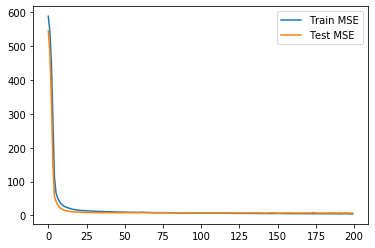

In [14]:
# 개선된 모델의 Epochs-MSE 그래프
import matplotlib.pyplot as plt

losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train MSE')
plt.plot(val_losses, label='Test MSE')
plt.legend()
plt.show()

**K-Fold 교차 검증 <br/>**
k-Fold Cross Validation은 Train Dataset을 균등하게 k개의 그룹(Fold)으로 나누고 (k - 1)개의 Test Fold와 1개의 Validation Fold로 지정.<br/>  그리고 나서 총 k회 검증을 하는데, 각 검증마다 Test Fold를 다르게 지정하여 성능을 측정. <br/>
이런 식으로 k회 검증이 완료되면 
각 Hyperparameter에 대한 검증 결과를 평균을 내어 Hyperparameters를 튜닝한다.

In [0]:
# K-Fold 모델 생성
def build_model():
    model = Sequential()
    # fully-connected layer를 추가 - 은닉층 2개, 출력층
    model.add(Dense(30, activation='relu', 
                    input_dim=X_train.shape[1]))  # 은닉층
    model.add(Dense(6, activation='relu'))  # 은닉층
    model.add(Dense(1))  # 출력층
    # 모델 컴파일
    model.compile(loss='mean_squared_error',  # 회귀(regression) - 수치 예측
                optimizer='adam')
    return model

processing 0-fold ...
processing 1-fold ...
processing 2-fold ...
processing 3-fold ...
[[566.46066674 556.66503562 545.01324142 531.37440869 515.18881753
  496.83765819 476.31359381 452.12003298 425.70804475 396.28293558
  364.54010721 330.8568877  296.23859342 262.34862937 227.30637101
  195.03770642 165.40844669 138.56327315 117.30957616  99.28721252
   85.74600329  74.71217553  66.42870744  59.73536562  54.44422838
   49.57575584  45.75809789  42.47269187  39.45019452  36.85500955
   34.76686412  32.97985302  31.55470689  30.22329439  29.08662884
   28.10247738  27.15425282  26.38283005  25.73722716  25.16277384
   24.59875332  24.03897982  23.61421208  23.22118408  22.81102635
   22.5298224   22.14556234  21.8512353   21.60762337  21.32704168
   21.07824805  20.83240082  20.63478089  20.41565929  20.19730366
   19.98614608  19.81341517  19.61613936  19.46331774  19.31160867
   19.08428863  18.92322213  18.77701629  18.579875    18.39631337
   18.2417646   18.05187597  17.90399883 

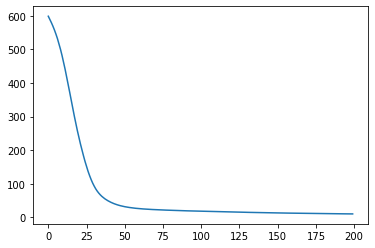

152/152 [==============================] - 0s 370us/sample - loss: 15.4475
15.447510468332391


In [18]:
k = 4  # k-fold cross-validation
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []

for i in range(k):
    print(f'processing {i}-fold ...')
    # k-fold CV에서 사용할 검증(validation) 데이터
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = Y_train[i * num_val_samples : (i + 1) * num_val_samples]
    
    # k-fold CV에서 사용할 학습(train) 데이터:
    # 원래 학습 데이터에서 검증 데이터를 제외한 나머지
    part_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    part_train_targets = np.concatenate(
        [Y_train[:i * num_val_samples],
         Y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    # 모델 생성 & 컴파일
    model = build_model()
    
    # 모델 학습
    fitted = model.fit(part_train_data, part_train_targets,
              epochs=num_epochs, verbose=0)
    loss = fitted.history['loss']
    all_scores.append(loss)

# K-Fold 모델 성능 시각화
all_scores = np.array(all_scores)
print(all_scores)

average_scores = all_scores.mean(axis=0)
plt.plot(average_scores)
plt.show()

# 모델 평가
eval = model.evaluate(test_data, Y_test)
print(eval)